In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/data/",one_hot=True)

c:\anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting /data/train-images-idx3-ubyte.gz
Extracting /data/train-labels-idx1-ubyte.gz
Extracting /data/t10k-images-idx3-ubyte.gz
Extracting /data/t10k-labels-idx1-ubyte.gz


In [5]:
learning_rate = 0.01
n_hidden_1 = 256
n_hidden_2 = 128
n_input = 784
#占位符
x = tf.placeholder("float",[None,n_input])
y = x
#学习参数
weights = {'encoder_h1': tf.Variable(tf.random_normal([n_input,n_hidden_1])),
           'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
           'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2,n_hidden_1])),
           'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1,n_input]))
          }

biases = {'encoder_b1': tf.Variable(tf.zeros([n_hidden_1])),
          'encoder_b2': tf.Variable(tf.zeros([n_hidden_2])),
          'decoder_b1': tf.Variable(tf.zeros([n_hidden_1])),
          'decoder_b2': tf.Variable(tf.zeros([n_input]))
         }

#编码
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,weights['encoder_h1']),biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,weights['encoder_h2']),biases['encoder_b2']))
    return layer_2

#解码
def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,weights['decoder_h1']),biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,weights['decoder_h2']),biases['decoder_b2']))
    return layer_2

#输出节点
encoder_out = encoder(x)
pred = decoder(encoder_out)
#cost为y与pred的平方差
cost = tf.reduce_mean(tf.pow(y - pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)


Epoch: 0001 cost= 0.205153167
Epoch: 0006 cost= 0.126584485
Epoch: 0011 cost= 0.114442326
Epoch: 0016 cost= 0.102075420
完成!
Accuracy: 1.0


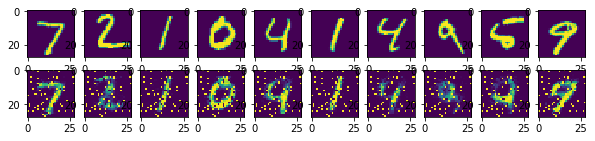

In [6]:
# 训练参数
training_epochs = 20  #一共迭代20次
batch_size = 256     #每次取256个样本
display_step = 5     #迭代5次输出一次信息
# 启动绘话
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    
    total_batch = int(mnist.train.num_examples/batch_size)
    # 开始训练
    for epoch in range(training_epochs):#迭代
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)#取数据
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs})# 训练模型
        if epoch % display_step == 0:# 现实日志信息
            print("Epoch:", '%04d' % (epoch+1),"cost=", "{:.9f}".format(c))

    print("完成!")
    
    # 测试
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 计算错误率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Accuracy:", 1-accuracy.eval({x: mnist.test.images, y: mnist.test.images}))
    
    #可视化
    show_num = 10
    reconstruction = sess.run(pred,feed_dict={x:mnist.test.images[:show_num]})
    f,a = plt.subplots(2,10,figsize=(10,2))
    for i in range(show_num):
        a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
        a[1][i].imshow(np.reshape(reconstruction[i],(28,28)))
    plt.draw()
    plt.show()